<a href="https://colab.research.google.com/github/yeonheuiyeon/Machine-Learning-Practice/blob/master/exercise4_20181237.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1 Tabular data
tabular 데이터는 우리가 평소에 많이 쓰는 spreadsheet나 relational database에 관련된 데이터이다.
---



In [0]:
from fastai.tabular import *

* tabular를 분석하기 위해 신경망을 사용하는것은 처음에는 회의 였으나 뉴럴 넷은 굉장히 유용했고 많은 기관에서 표데이터를 어떻게 분석하는지 논문과 게시물을 발행하기 시작했다.

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

- 데이터가 Pandas DataFrame 에 있어야 한다. Pandas DataFrame는 파이썬의 tabular 표준 형식 이다. 다양한 방법으로 읽어올 수 있지만 pd.read_csv() 방식을 주로 사용하며, 언제든지 쉽게 Pandas DataFrame 형식으로 만들 수 있다.

- 데이터는 성인 샘플로서 오래되고 고전적인 데이터 셋이다. csv 파일이기에 pd.read_csv() 사용 가능하고 스파크나 하둡이 있다면 동일하게 읽는 것이 가능함.

In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

- df : 데이터프레임 정의
-path : 모델 및 중간 단계 저장 사용경로
- cat_names, cont_names:  범주형 변수 및 연속변수 정의

- 컴퓨터 비전의 변형을 살펴 보면 뒤집거나, 돌리거나, 밝게 하거나, 정상화 하는 등의 일을 합니다. 표 데이터에는 변환 대신 프로세서 라는 것이 있다. 기본적으로 우리의 작업 전에 미리 처리 한다. 

- Fillmissing : 누락된 값을 찾고 어떤식으로든 처리 하기
- Categorify : 범주형 변수 찾아 Pandas 범주로 변형
-Normalize : 연속변수를 취하여 평균을 뺀다음 표준 편차로 나누어 01변수인 정규화 진행

- 정상화는 중요하다. 비어있는 값이나 놓친 값이 있다면 train, vaild, test 셋에 다 동일한 처리를 해줘야 한다. 그것이 까다로운데 fastai는 그작업을 대신해준다. 

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

- split_by_idx() : train set과 vaild set으로 나눈다. 800~1000까지의 인덱스 목록으로 나눈다. 같은 데이터 형식을 유지하기 위해 위와 같은 코드를 실행한다.

- label_from_df : 데이터 프레임에서 라벨이 나오기 때문에 해당열만 알려주기

- add_test() : 데이터 셋 추가하기

- dataunch() : 데이터 묶음 가져오기

In [0]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Assoc-voc,Divorced,Transport-moving,Not-in-family,White,False,-0.2629,-0.1626,0.3599,<50k
Federal-gov,Some-college,Never-married,Tech-support,Not-in-family,White,False,-1.3624,-0.1062,-0.0312,<50k
Private,Bachelors,Divorced,Exec-managerial,Not-in-family,White,False,0.1769,1.4686,1.1422,>=50k
Private,HS-grad,Never-married,Other-service,Unmarried,Black,False,-0.3362,1.3407,-0.4224,<50k
Private,Masters,Widowed,Exec-managerial,Not-in-family,White,True,1.4962,-0.8589,-0.0312,>=50k
?,HS-grad,Widowed,?,Not-in-family,White,False,1.7894,-0.3121,-0.4224,<50k
Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,False,-0.9959,0.0773,1.1422,<50k
Private,12th,Never-married,Sales,Own-child,White,False,-1.5090,-0.6719,-0.8135,<50k
Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,False,1.3496,0.2743,-0.4224,<50k
Private,Some-college,Never-married,Other-service,Unmarried,White,False,-1.1425,1.7767,-0.0312,<50k


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

- layers=[200,100] : 이부분은 어떠한 레이어로 학습을 시킬지 정하는 부분


In [0]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.363950,0.389682,0.805000,00:06


In [0]:
row = df.iloc[0]

In [0]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.3720, 0.6280]))

# 2. Collab data


- collaborative filtering
기본적인 정보외에 그 사람이 생각하는 것이나 성향을 함께 저장할 수 있는 협업 필터링 

In [0]:
from fastai.collab import *

- GroupLens 그룹이 만든 MovieLens데이터 셋을 만듬. 다양한 크기(2천만 등급, 10만 등급)를 다운로드할 수 있다.

In [0]:
user,item,title = 'userId','movieId','title'

In [0]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [0]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

- n_factors : 아키텍처, 얼마나 많은 요소(n_factors)를 사용하고자 하는지 지정
- y_range : 도움이 될 수 있는 것은 점수 범위가 얼마나 되는지 알려주는 것이다. 

In [0]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.607055,0.947133,00:00
1,0.848773,0.672979,00:00
2,0.657237,0.662605,00:00


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path="/content/gdrive/My Drive/ml-100k"

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
ratings = pd.read_csv('/content/gdrive/My Drive/ml-100k/u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


<<저번에 교수님께서 알려주신 드라이브 연동방식으로 시도했다. 다만 path를 설정했을 경우에는 되지 않았는데 바로 넣어줬을때는 됬다.>>

In [0]:
movies = pd.read_csv('/content/gdrive/My Drive/ml-100k/u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
len(ratings)

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [0]:
data.show_batch()

userId,title,target
873,Liar Liar (1997),4.0
753,Terminator 2: Judgment Day (1991),1.0
92,"Adventures of Priscilla, Queen of the Desert, The (1994)",4.0
328,Evita (1996),4.0
806,Heat (1995),4.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


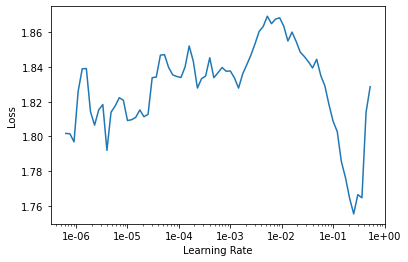

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.899719,0.933140,00:10
1,0.877196,0.882231,00:10
2,0.768421,0.832846,00:10
3,0.651766,0.811524,00:10
4,0.567124,0.810981,00:11


In [0]:
learn.save('dotprod')

- fastai에 의해 만들어지고 있는 모델들은 사실 PyTorch 이다. 그리고 PyTorch 모델은 nn이라고 불린다.그들의 모델의 PyTorch에 있는 모듈. PyTorch nn일 때.모듈은 실행된다( 레이어, 신경망 등의 결과를 계산할 때), 구체적으로는 항상 당신이 forward()라 부른다. 
모형이 처음에 만들어질 때, 우리가 앞서 파이톤에서 잠깐 언급했듯이, 그것은 이것을 _ init_()라고 부른다. \따라서 _ init_(dunder init, 참고 사항, 코드에서 밑줄 사이에 공백이 없음)은 모델을 만드는 방법이며, Forward()는 모델을 실행하는 방법이다.
모델의 출력을 계산하는 방법만 알려주면 PyTorch가 먼저 가서 경사를 계산해 준다.

따라서 이 경우 모델은 다음을 포함한다.

* 사용자 가중치 : u_weight
* 품목가중치 세트 -i_weight
* 사용자 자신을 위한 일련의 가중치 : u_bias
* 아이템에 대한 가중치 : i_bias

In [0]:
learn.load('dotprod');
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

- 그것은 nn.Embedding 이라 불린다. 또한 PyTorch에서는 우리를 위해 표준 신경망레이어를 설치해 놓았다. 그래서 임베딩을 만든다.

임베딩은 weight의 행렬

In [0]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [0]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3708),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3330),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2883), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2855), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2677), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2635), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2537), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2531), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2496), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2397), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2356), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2292), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2273), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2189), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2166), 'Grease 

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6458), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.6002), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5773), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5508), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5416), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5138), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5138), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5050), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4885), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4875), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4818), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4783), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4774), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4703), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4693), 'Good Will Hunting (1997)', 4.262626262626263)]

In [0]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [0]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.3039), 'Home Alone 3 (1997)'),
 (tensor(1.2467), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.2198), 'Jungle2Jungle (1997)'),
 (tensor(1.1816), "McHale's Navy (1997)"),
 (tensor(1.1586), 'Congo (1995)'),
 (tensor(1.1563), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1085), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.0893), 'Leave It to Beaver (1997)'),
 (tensor(1.0608), 'Batman & Robin (1997)'),
 (tensor(1.0578), 'Bio-Dome (1996)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1180), 'Casablanca (1942)'),
 (tensor(-1.0779), 'Chinatown (1974)'),
 (tensor(-1.0522), 'When We Were Kings (1996)'),
 (tensor(-1.0141), 'Close Shave, A (1995)'),
 (tensor(-1.0101), 'Lawrence of Arabia (1962)'),
 (tensor(-1.0055), 'Wrong Trousers, The (1993)'),
 (tensor(-0.9859), 'Citizen Kane (1941)'),
 (tensor(-0.9744), 'Secrets & Lies (1996)'),
 (tensor(-0.9664),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(-0.9641), 'Apocalypse Now (1979)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1195), 'Titanic (1997)'),
 (tensor(1.0880), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.0757), 'Braveheart (1995)'),
 (tensor(0.8792), 'Affair to Remember, An (1957)'),
 (tensor(0.8683), 'Star Wars (1977)'),
 (tensor(0.8524), "It's a Wonderful Life (1946)"),
 (tensor(0.8505), 'American President, The (1995)'),
 (tensor(0.8169), 'Independence Day (ID4) (1996)'),
 (tensor(0.8132), 'Back to the Future (1985)'),
 (tensor(0.8130), 'Hunt for Red October, The (1990)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8813), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.8458), 'Trainspotting (1996)'),
 (tensor(-0.8127), 'Keys to Tulsa (1997)'),
 (tensor(-0.7779), 'Crumb (1994)'),
 (tensor(-0.7680), 'Brazil (1985)'),
 (tensor(-0.7403), 'Beavis and Butt-head Do America (1996)'),
 (tensor(-0.7291), 'Rosencrantz and Guildenstern Are Dead (1990)'),
 (tensor(-0.7207), 'Big Night (1996)'),
 (tensor(-0.7183), 'Clockwork Orange, A (1971)'),
 (tensor(-0.7110), 'Road to Wellville, The (1994)')]

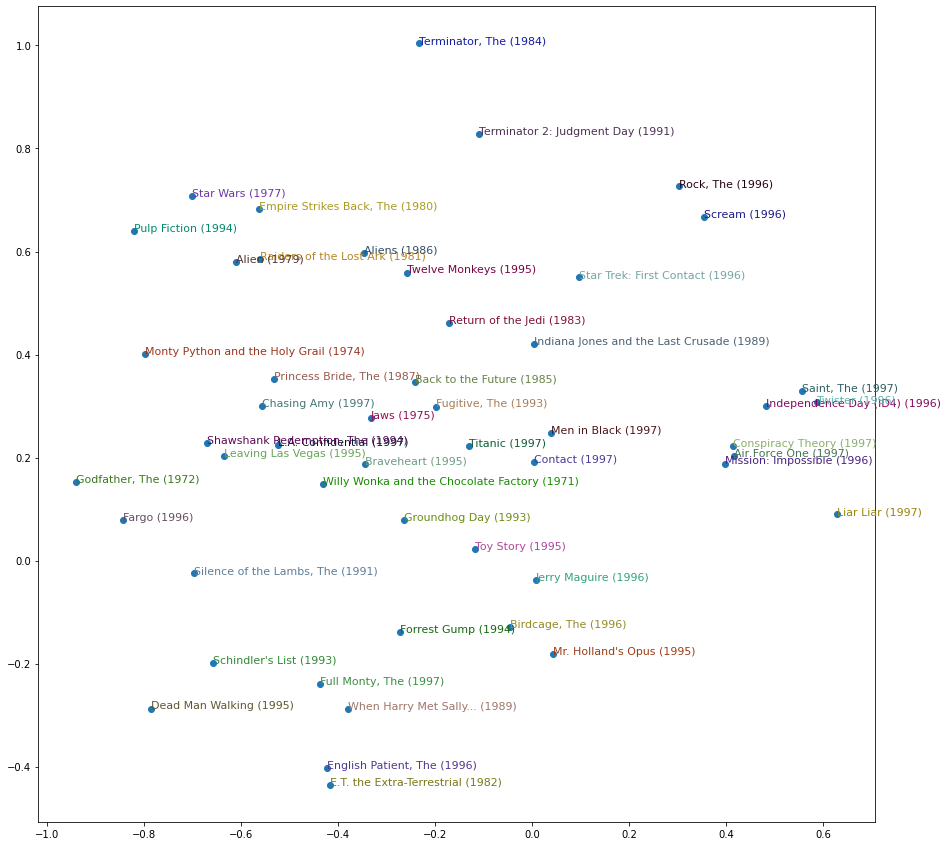

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

# 3. IMDB 다시 해보기 


- 영화 평론에 대한 데이터 셋. 긍정인지 부정인지에 대한 결과를 가지고 있는 25000개의 영화리뷰.

* 언어 모델에 대해서 :
NLP에 대한 이전의 접근법은 주로 Ngrams를 사용했다. Ngrams는 이 쌍이나 세 쌍의 단어들이 서로 옆에서 얼마나 자주 발생하는지를 의미한다. 여기서 Ngrams는 다음 단어가 무엇일지 결정할 충분한 정보가 없지만 신경망은 가능하다.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [0]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [0]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [0]:
data.train_ds[0][0]

Text xxbos xxmaj xxunk xxmaj xxunk 's film may be not so famous as xxmaj xxunk xxmaj view , 3 xxmaj days of the xxmaj xxunk or xxup xxunk but it is certainly not worse and sometimes even better than these classic xxunk of the genre . xxmaj action takes place in fictional western state where fictional president has been killed . xxmaj after several years of investigation , special government commission decides that president was killed by a lone gunman . xxmaj but one man - xxunk xxmaj xxunk , played by xxmaj xxunk xxmaj xxunk - thinks there 's something more to be investigated and so the film starts . xxmaj this movie does n't deal with some exact xxunk , but it embraces the whole structure of relationship between government and society in today 's world . xxmaj such film could be made only in the xxunk but it will never lose it 's actuality . xxmaj furthermore , it 's even a bit xxunk how precise are it 's xxunk . 10 out of 10 .

In [0]:
data.train_ds[0][0].data[:10]

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
bs=48

In [0]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/train')]

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)
data_lm.show_batch()

idx,text
0,"xxmaj mission xxmaj force ' ) , this film is one of the most unwatchable films the world has ever seen . xxmaj it 's right up there with ` xxmaj plan 9 xxmaj from xxmaj outer xxmaj space ' on the sleep inducing scale . xxmaj the plot is twisted up and knotted like a 50 foot ball of yarn the cat 's been playing with and finally left"
1,like the this xxmaj motorola blue - tooth headset they 're using to eliminate the use of a walkie talkie it was just so funny .. they look like amateurs . xxmaj and they where like advertising those badly designed alien - ware xxmaj laptops that could link up to a satellite to find people .. i could n't say more about this xxup tv - movie .. xxmaj the
2,"1986 ] "" was n't as good as "" xxmaj dr. xxmaj strangelove "" and it was n't as good as "" xxmaj the xxmaj bridge on the xxmaj river xxmaj kwai "" . xxmaj heck , it was n't even as good as "" xxup g.i. xxmaj jane "" , which is pretty sad . \n \n xxmaj the film revolves around a basic ethical problem : xxmaj"
3,". xxbos xxmaj tarzan , the environmental awareness leader , faces four trappers who by most unorthodox means abduct animals to get them to xxmaj xxunk . xxmaj tarzan has a bland but sexy enough wife with an impeccable hairdo , and a kid . xxmaj no one should fault xxmaj tarzan for being grieved by the vicious actions of the hunters . \n \n xxmaj this xxmaj gordon"
4,"thought this was a strictly by - the - numbers uninspiring creature feature . xxmaj it 's early into the new year & xxmaj stinger is the first giant genetically mutated monster / creature / insect type film i 've seen in 2007 , hopefully things can only get better ... xxmaj the script by xxmaj mat xxmaj xxunk is incredibly clichéd & gets all of it 's ideas from"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)


NameError: ignored

In [0]:
learn.recorder.plot(skip_end=15)

NameError: ignored

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [0]:
learn.save('fine_tuned')
learn.load('fine_tuned');
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

NameError: ignored

In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path = untar_data(URLs.IMDB)
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')
data_clas = load_data(path, 'data_clas.pkl', bs=bs)
data_clas.show_batch()

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [0]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

In [0]:
learn.save('first')
learn.load('first');
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [0]:
learn.save('second')
learn.load('second');
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
learn.save('third')
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [0]:
learn.predict("I really loved that movie, it was awesome!")

# 실행 파일 캡쳐본 링크
https://drive.google.com/open?id=1CtJs7ML4rHhWcnRultbC9P35dO5GfPha